<h3>Import Packages<h3>

In [ ]:
import telebot
import time
import twstock
from sqlalchemy import create_engine
import pandas as pd
import talib
import lightgbm as lgb
from imgurpython import ImgurClient
import urllib
import requests
from bs4 import BeautifulSoup
import kchart 
import xgboost
from sklearn.ensemble import RandomForestClassifier
from twsr import get_historical_data, get_data_months, get_tw_stock

<h3>Connect with MySQL<h3>

In [ ]:
def connect_sql(database,echo):
    engine = create_engine("mysql+pymysql://root:")
    return engine
engine = connect_sql('twse',False)

<h3>Greet with The User<h3>

In [7]:
print('🤖🤖🤖\n'+'Welcome! Im Lil Stock bot!\n' + '要查詢股票請輸入@後面加上要查詢的股票代號😉\n'+'e.g. @2330\n'+'⚠查詢使用說明請輸入help')

🤖🤖🤖
Welcome! Im Lil Stock bot!
要查詢股票請輸入@後面加上要查詢的股票代號😉
e.g. @2330
⚠查詢使用說明請輸入help


<h3>Ask the User to Enter Stock id<h3>

In [9]:
stock_id = input('請輸入欲查詢之股票代號:')

請輸入欲查詢之股票代號: 2330


In [10]:
print('正在計算與擷取資料，請耐心等待3~4分鐘🤖\n'+'⚠若等待過久請再輸入一次指令')

正在計算與擷取資料，請耐心等待3~4分鐘🤖
⚠若等待過久請再輸入一次指令


<h3>Get Stock Information<h3>

Here you can get the stock's basic informaiton. The twstock package gets stock informaiton from Taiwan Stock Exchange.

In [12]:
content = ''
stockid = stock_id
stock_rt = twstock.realtime.get(stockid)
sname = stock_rt['info']['name']

content += '%s (%s) \n' %(
    stock_rt['info']['code'],
    stock_rt['info']['name'])
content += '現價: %s / 開盤: %s\n'%(
    stock_rt['realtime']['latest_trade_price'],
    stock_rt['realtime']['open'])
content += '最高: %s / 最低: %s\n' %(
    stock_rt['realtime']['high'],
    stock_rt['realtime']['low'])
content += '量: %s\n' %(stock_rt['realtime']['accumulate_trade_volume'])
print(content)

2330 (台積電) 
現價: 566.0000 / 開盤: 560.0000
最高: 572.0000 / 最低: 559.0000
量: 33636



Here is the SQL syntax, which requires stock data from MySQL database.

In [16]:
selecttex =  '''SELECT * FROM specialtopics.'''
ordertext =  ''' ORDER BY mdate ASC;'''
text = 'id' + stock_id
sqltext = selecttex + text + ordertext
df = pd.read_sql_query(sqltext, engine, index_col='mdate')
close = df['close_adj']
volume=df['volume']
low=df['low_adj']
high=df['high_adj']
open_=df['open_adj']

<h3>Create 140 Technical Indicators For Model Training<h3>

Ues stock data including, open_adj, close_adj, high_adj, low_adj, volume to create 140 technical indicators. You can find the explanation for each indicators at https://github.com/mrjbq7/ta-lib

In [17]:
ad = talib.AD(high, low, close, volume)
adosc1 = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=7)
adosc2 = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
adosc3 = talib.ADOSC(high, low, close, volume, fastperiod=4, slowperiod=10)
adosc4 = talib.ADOSC(high, low, close, volume, fastperiod=5, slowperiod=10)
adosc5 = talib.ADOSC(high, low, close, volume, fastperiod=6, slowperiod=10)
adosc6 = talib.ADOSC(high, low, close, volume, fastperiod=7, slowperiod=10)
adosc7 = talib.ADOSC(high, low, close, volume, fastperiod=5, slowperiod=12)
adosc8 = talib.ADOSC(high, low, close, volume, fastperiod=5, slowperiod=14)
adosc9 = talib.ADOSC(high, low, close, volume, fastperiod=7, slowperiod=14)
adosc10 = talib.ADOSC(high, low, close, volume, fastperiod=4, slowperiod=10)
obv = talib.OBV(close, volume)

#Overlap Studies Functions  mavp 
upperband1, middleband1, lowerband1 = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
upperband2, middleband2, lowerband2 = talib.BBANDS(close, timeperiod=10, nbdevup=2, nbdevdn=2, matype=0)
dema1 = talib.DEMA(close, timeperiod=2)
dema2 = talib.DEMA(close, timeperiod=3)
dema3 = talib.DEMA(close, timeperiod=4)
dema4 = talib.DEMA(close, timeperiod=5)
dema5 = talib.DEMA(close, timeperiod=6)
dema6 = talib.DEMA(close, timeperiod=7)
dema7 = talib.DEMA(close, timeperiod=8)
dema8 = talib.DEMA(close, timeperiod=9)
dema9 = talib.DEMA(close, timeperiod=10)
dema10 = talib.DEMA(close, timeperiod=12)
dema11 = talib.DEMA(close, timeperiod=14)
dema12 = talib.DEMA(close, timeperiod=15)
dema13 = talib.DEMA(close, timeperiod=16)
dema14 = talib.DEMA(close, timeperiod=18)
dema15 = talib.DEMA(close, timeperiod=20)
dema16 = talib.DEMA(close, timeperiod=30)#原始參數
dema17 = talib.DEMA(close, timeperiod=40)
dema18 = talib.DEMA(close, timeperiod=60)
dema19 = talib.DEMA(close, timeperiod=90)
dema20 = talib.DEMA(close, timeperiod=120)
ema1= talib.EMA(close, timeperiod=5)
ema2= talib.EMA(close, timeperiod=10)
ema3= talib.EMA(close, timeperiod=12)
ema4= talib.EMA(close, timeperiod=26)
ema5= talib.EMA(close, timeperiod=30)
ema6= talib.EMA(close, timeperiod=60)
htt = talib.HT_TRENDLINE(close)
kama1 = talib.KAMA(close, timeperiod=3)
kama2 = talib.KAMA(close, timeperiod=5)
kama3 = talib.KAMA(close, timeperiod=10)
kama4 = talib.KAMA(close, timeperiod=15)
kama5 = talib.KAMA(close, timeperiod=20)
kama6 = talib.KAMA(close, timeperiod=30)
kama7 = talib.KAMA(close, timeperiod=60)
#日線、3日線、週線、雙週線、三週線、月線、雙月線、季線、半年線、年線
ma1 = talib.MA(close, timeperiod=1, matype=0)
ma2 = talib.MA(close, timeperiod=3, matype=0)
ma3 = talib.MA(close, timeperiod=5, matype=0)
ma4 = talib.MA(close, timeperiod=10, matype=0)
ma5 = talib.MA(close, timeperiod=15, matype=0)
ma6 = talib.MA(close, timeperiod=20, matype=0)
ma7 = talib.MA(close, timeperiod=40, matype=0)
ma8 = talib.MA(close, timeperiod=60, matype=0)
ma9 = talib.MA(close, timeperiod=120, matype=0)
ma10 = talib.MA(close, timeperiod=250, matype=0)
mama, fama = talib.MAMA(close, fastlimit=0.5, slowlimit=0.05)
#'mavp': talib.MAVP(close, periods = ? , minperiod=2, maxperiod=30, matype=0),
#midpoint反應價格變動的極值,是收盤價最大值和最小值的平均值
midpoint1 = talib.MIDPOINT(close, timeperiod=2)#不能設1
midpoint2 = talib.MIDPOINT(close, timeperiod=3)
midpoint3 = talib.MIDPOINT(close, timeperiod=5)
midpoint4 = talib.MIDPOINT(close, timeperiod=10)
midpoint5 = talib.MIDPOINT(close, timeperiod=14)
midpoint6 = talib.MIDPOINT(close, timeperiod=15)
midpoint7 = talib.MIDPOINT(close, timeperiod=20)
midpoint8 = talib.MIDPOINT(close, timeperiod=40)
midpoint9 = talib.MIDPOINT(close, timeperiod=60)
#midprice選擇的是週期內最高價的最大值和最低價的最小值作為參數
midprice1 = talib.MIDPRICE(high, low, timeperiod=2)
midprice2 = talib.MIDPRICE(high, low, timeperiod=3)
midprice3 = talib.MIDPRICE(high, low, timeperiod=5)
midprice4 = talib.MIDPRICE(high, low, timeperiod=10)
midprice5 = talib.MIDPRICE(high, low, timeperiod=14)
midprice6 = talib.MIDPRICE(high, low, timeperiod=15)
midprice7 = talib.MIDPRICE(high, low, timeperiod=20)
midprice8 = talib.MIDPRICE(high, low, timeperiod=40)
midprice9 = talib.MIDPRICE(high, low, timeperiod=60)
sar = talib.SAR(high, low, acceleration=0.02, maximum=0.2)
sarext = talib.SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0.02, accelerationlong=0.02, accelerationmaxlong=0.2, accelerationinitshort=0.02, accelerationshort=0.02, accelerationmaxshort=0.2)
#簡單移動平均，將過去某特定時間內的向量值取其平均值
sma1 = talib.SMA(close, timeperiod=2)
sma2 = talib.SMA(close, timeperiod=3)
sma3 = talib.SMA(close, timeperiod=5)
sma4 = talib.SMA(close, timeperiod=10)
sma5 = talib.SMA(close, timeperiod=14)
sma6 = talib.SMA(close, timeperiod=20)
sma7 = talib.SMA(close, timeperiod=30)
sma8 = talib.SMA(close, timeperiod=50)
sma9 = talib.SMA(close, timeperiod=60)
sma10 = talib.SMA(close, timeperiod=100)
sma11 = talib.SMA(close, timeperiod=200)
t3_1 = talib.T3(close, timeperiod=3, vfactor=0.7)
t3_2 = talib.T3(close, timeperiod=5, vfactor=0.7)
t3_3 = talib.T3(close, timeperiod=7, vfactor=0.7)
t3_4 = talib.T3(close, timeperiod=10, vfactor=0.7)
t3_5 = talib.T3(close, timeperiod=15, vfactor=0.7)
t3_6 = talib.T3(close, timeperiod=20, vfactor=0.7)
t3_7 = talib.T3(close, timeperiod=40, vfactor=0.7)
t3_8 = talib.T3(close, timeperiod=60, vfactor=0.7)
t3_9 = talib.T3(close, timeperiod=120, vfactor=0.7)
tema1 = talib.TEMA(close, timeperiod=5)
tema2 = talib.TEMA(close, timeperiod=10)
tema3 = talib.TEMA(close, timeperiod=12)
tema4 = talib.TEMA(close, timeperiod=26)
tema5 = talib.TEMA(close, timeperiod=30)
tema6 = talib.TEMA(close, timeperiod=60)
trima1 = talib.TRIMA(close, timeperiod=5)
trima2 = talib.TRIMA(close, timeperiod=10)
trima3 = talib.TRIMA(close, timeperiod=30)
trima4 = talib.TRIMA(close, timeperiod=60)
wma1 = talib.WMA(close, timeperiod=5)
wma2 = talib.WMA(close, timeperiod=10)
wma3 = talib.WMA(close, timeperiod=30)
wma4 = talib.WMA(close, timeperiod=60)
#Momentum Indicator
adx1 = talib.ADX(high, low, close, timeperiod=7)
adx2 = talib.ADX(high, low, close, timeperiod=10)
adx3 = talib.ADX(high, low, close, timeperiod=14)#起始參數為14
adx4 = talib.ADX(high, low, close, timeperiod=15)
adx5= talib.ADX(high, low, close, timeperiod=20)
adx6 = talib.ADX(high, low, close, timeperiod=28)
adx7 = talib.ADX(high, low, close, timeperiod=5)
adx8 = talib.ADX(high, low, close, timeperiod=25)
adxr1 = talib.ADXR(high, low, close, timeperiod=7)
adxr2 = talib.ADXR(high, low, close, timeperiod=10)
adxr3 = talib.ADXR(high, low, close, timeperiod=14)#起始參數為14
adxr4 = talib.ADXR(high, low, close, timeperiod=15)
adxr5= talib.ADXR(high, low, close, timeperiod=20)
adxr6 = talib.ADXR(high, low, close, timeperiod=28)
apo1 = talib.APO(close, fastperiod=6, slowperiod=13, matype=0)
apo2 = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)#內建
aroondown1, aroonup1 = talib.AROON(high, low, timeperiod=7)
aroondown2, aroonup2 = talib.AROON(high, low, timeperiod=14)
aroondown3, aroonup3 = talib.AROON(high, low, timeperiod=25)
aroonosc1 = talib.AROONOSC(high, low, timeperiod=7)
aroonosc2 = talib.AROONOSC(high, low, timeperiod=14)
aroonosc3 = talib.AROONOSC(high, low, timeperiod=25)
bop = talib.BOP(open_, high, low, close)
cci1 = talib.CCI(high, low, close, timeperiod=7)
cci2 = talib.CCI(high, low, close, timeperiod=14)
cci3 = talib.CCI(high, low, close, timeperiod=28)
cmo1 = talib.CMO(close, timeperiod=7)
cmo2 = talib.CMO(close, timeperiod=14)
cmo3 = talib.CMO(close, timeperiod=28)
dx1 = talib.DX(high, low, close, timeperiod=7)
dx2 = talib.DX(high, low, close, timeperiod=14)
dx3 = talib.DX(high, low, close, timeperiod=28)
macd1, macdsignal1, macdhist1 = talib.MACD(close, fastperiod=8, slowperiod=13, signalperiod=9)
macd2, macdsignal2, macdhist2 = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
mfi1 = talib.MFI(high, low, close, volume, timeperiod=5)
mfi2 = talib.MFI(high, low, close, volume, timeperiod=7)
mfi3 = talib.MFI(high, low, close, volume, timeperiod=10)
mfi4 = talib.MFI(high, low, close, volume, timeperiod=14)#原始參數
mfi5 = talib.MFI(high, low, close, volume, timeperiod=15)
mfi6 = talib.MFI(high, low, close, volume, timeperiod=28)
minus_di1 =talib.MINUS_DI(high, low, close, timeperiod=5)
minus_di2 =talib.MINUS_DI(high, low, close, timeperiod=7)
minus_di3 =talib.MINUS_DI(high, low, close, timeperiod=10)
minus_di4 =talib.MINUS_DI(high, low, close, timeperiod=14)#原始參數
minus_di5 =talib.MINUS_DI(high, low, close, timeperiod=15)
minus_di6 =talib.MINUS_DI(high, low, close, timeperiod=28)
minus_dm1 = talib.MINUS_DM(high, low, timeperiod=5)
minus_dm2 = talib.MINUS_DM(high, low, timeperiod=7)
minus_dm3 = talib.MINUS_DM(high, low, timeperiod=10)
minus_dm4 = talib.MINUS_DM(high, low, timeperiod=14)#原始參數
minus_dm5 = talib.MINUS_DM(high, low, timeperiod=15)
minus_dm6 = talib.MINUS_DM(high, low, timeperiod=28)
mom1 = talib.MOM(close, timeperiod=5)
mom2 = talib.MOM(close, timeperiod=10)#原始參數
mom3 = talib.MOM(close, timeperiod=15)
mom4 = talib.MOM(close, timeperiod=20)
plus_di1 =talib.PLUS_DI(high, low, close, timeperiod=5)
plus_di2 =talib.PLUS_DI(high, low, close, timeperiod=7)
plus_di3 =talib.PLUS_DI(high, low, close, timeperiod=10)
plus_di4 =talib.PLUS_DI(high, low, close, timeperiod=14)#原始參數
plus_di5 =talib.PLUS_DI(high, low, close, timeperiod=15)
plus_di6 =talib.PLUS_DI(high, low, close, timeperiod=28)
plus_dm1 =talib.PLUS_DM(high, low, timeperiod=5)
plus_dm2 =talib.PLUS_DM(high, low, timeperiod=7)
plus_dm3 =talib.PLUS_DM(high, low, timeperiod=10)
plus_dm4 =talib.PLUS_DM(high, low, timeperiod=14)#原始參數
plus_dm5 =talib.PLUS_DM(high, low, timeperiod=15)
plus_dm6 =talib.PLUS_DM(high, low, timeperiod=28)
ppo1 = talib.PPO(close, fastperiod=6, slowperiod=13, matype=0)
ppo2 = talib.PPO(close, fastperiod=8, slowperiod=13, matype=0)
ppo3 = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
roc1 = talib.ROC(close, timeperiod=5)
roc2 = talib.ROC(close, timeperiod=10)#原始參數
roc3 = talib.ROC(close, timeperiod=15)
roc4 = talib.ROC(close, timeperiod=20)
rocp1 = talib.ROCP(close, timeperiod=5)
rocp2 = talib.ROCP(close, timeperiod=10)#原始參數
rocp3 = talib.ROCP(close, timeperiod=15)
rocp4 = talib.ROCP(close, timeperiod=20)
rocr1 = talib.ROCR(close, timeperiod=5)
rocr2 = talib.ROCR(close, timeperiod=10)#原始參數
rocr3 = talib.ROCR(close, timeperiod=15)
rocr4 = talib.ROCR(close, timeperiod=20)
rsi1 = talib.RSI(close, timeperiod=3)
rsi2 = talib.RSI(close, timeperiod=6)
rsi3 = talib.RSI(close, timeperiod=12)
rsi4 = talib.RSI(close, timeperiod=7)
rsi5 = talib.RSI(close, timeperiod=14)#原始參數
rsi6 = talib.RSI(close, timeperiod=28)
slowk1, slowd1 = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)#原始參數
slowk2, slowd2 = talib.STOCH(high, low, close, fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
fastk1, fastd1 = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)#原始參數
fastk2, fastd2 = talib.STOCHF(high, low, close, fastk_period=9, fastd_period=3, fastd_matype=0)
rfastk1, rfastd1 = talib.STOCHRSI(close, timeperiod=7, fastk_period=5, fastd_period=3, fastd_matype=0)
rfastk2, rfastd2 = talib.STOCHRSI(close, timeperiod=7, fastk_period=9, fastd_period=3, fastd_matype=0)
rfastk3, rfastd3 = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)#原始參數
rfastk4, rfastd4 = talib.STOCHRSI(close, timeperiod=14, fastk_period=9, fastd_period=3, fastd_matype=0)
trix1 = talib.TRIX(close, timeperiod=5)
trix2 = talib.TRIX(close, timeperiod=10)
trix3 = talib.TRIX(close, timeperiod=12)
trix4 = talib.TRIX(close, timeperiod=26)
trix5 = talib.TRIX(close, timeperiod=30)#原始參數
trix6 = talib.TRIX(close, timeperiod=60)
ultosc1 = talib.ULTOSC(high, low, close, timeperiod1=3, timeperiod2=7, timeperiod3=14)
ultosc2 = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)#原始參數
ultosc3 = talib.ULTOSC(high, low, close, timeperiod1=14, timeperiod2=28, timeperiod3=56)
willr1 =talib. WILLR(high, low, close, timeperiod=7)
willr2 =talib. WILLR(high, low, close, timeperiod=14)#原始參數
willr3 =talib. WILLR(high, low, close, timeperiod=28)
#Volatility Indicator
ATR1 = talib.ATR(high, low, close, timeperiod=7)
ATR2 = talib.ATR(high, low, close, timeperiod=14)
ATR3 = talib.ATR(high, low, close, timeperiod=28)
NATR1 = talib.NATR(high, low, close, timeperiod=7)
NATR2 = talib.NATR(high, low, close, timeperiod=14)
NATR3 = talib.NATR(high, low, close, timeperiod=28)
TRANGE = talib.TRANGE(high, low, close)

#Price Transform 
avgprice = talib.AVGPRICE(open_, high, low, close)
medprice = talib.MEDPRICE(high, low)
trpprice = talib.TYPPRICE(high, low, close)
wclprice = talib.WCLPRICE(high, low, close)

#Cycle Indicator 
ht_dcperiod = talib.HT_DCPERIOD(close)
ht_dcphace = talib.HT_DCPHASE(close)
inphase, quadrature = talib.HT_PHASOR(close)
sine, leadsine = talib.HT_SINE(close)
ht_trendmode = talib.HT_TRENDMODE(close)






dataset = pd.DataFrame({
    #Volume Indicator
    'ad': talib.AD(high, low, close, volume),
    'adosc fastperiod=3 slowperiod=7' : adosc1,
    'adoscfastperiod=3 slowperiod=10' : adosc2,
    'adoscfastperiod=4 slowperiod=10' : adosc3,
    'adoscfastperiod=5 slowperiod=10' : adosc4,
    'adoscfastperiod=6 slowperiod=10' : adosc5,
    'adoscfastperiod=7 slowperiod=10' : adosc6,
    'adoscfastperiod=5 slowperiod=12' : adosc7,
    'adoscfastperiod=5 slowperiod=14' : adosc8,
    'adoscfastperiod=7 slowperiod=14' : adosc9,
    'adoscfastperiod=4 slowperiod=10' : adosc10,
    'obv' : talib.OBV(close, volume),
    #Overlap Studies 
    'upperband timeperiod=5':upperband1,
    'middleband timeperiod=5':middleband1,
    'lowerband timeperiod=5':lowerband1,
    'upperband timeperiod=10':upperband2,
    'middleband timeperiod=10':middleband2,
    'lowerband timeperiod=10':lowerband2,
    'dema timeperiod=2' : dema1,
    'dema timeperiod=3' : dema2,
    'dema timeperiod=4' : dema3,
    'dema timeperiod=5' : dema4,
    'dema time eriod=6' : dema5,
    'dema timeperiod=7' : dema6,
    'dema timeperiod=8' : dema7,
    'dema timeperiod=9' : dema8,
    'dema time eriod=10' : dema9,
    'dema timeperiod=12' : dema10,
    'dema timeperiod=14' : dema11,
    'dema timeperiod=15' : dema12,
    'dema timeperiod=16' : dema13,
    'dema timeperiod=18' : dema14,
    'dema timeperiod=20' : dema15,
    'dema timeperiod=30' : dema16,
    'dema timeperiod=40' : dema17,
    'dema timeperiod=60' : dema18,
    'dema timeperiod=90' : dema19,
    'dema timeperiod=120' : dema20,
    'ema timeperiod=5' : ema1,
    'ema timeperiod=10' : ema2,
    'ema timeperiod=12' : ema3,
    'ema timeperiod=26' : ema4,
    'ema timeperiod=30' : ema5,
    'ema timeperiod=60' : ema6,
    'htt' : htt,
    'kama timeperiod=3' : kama1,
    'kama timeperiod=5' : kama2,
    'kama timeperiod=10' : kama3,
    'kama timeperiod=15' : kama4,
    'kama timeperiod=20' : kama5,
    'kama timeperiod=30' : kama6,
    'kama timeperiod=60' : kama7,
    'ma timeperiod=1': ma1,
    'ma timeperiod=3': ma2,
    'ma timeperiod=5': ma3,
    'ma timeperiod=10' : ma4,
    'ma timeperiod=15' : ma5,
    'ma timeperiod=20' : ma6,
    'ma timeperiod=40' : ma7,
    'ma timeperiod=60' : ma8,
    'ma timeperiod=120' : ma9,
    'ma timeperiod=250' : ma10,
    'mama': mama,
    'fama': fama,
    'midpoint timeperiod=2' : midpoint1,
    'midpoint timeperiod=3' : midpoint2,
    'midpoint timeperiod=5' : midpoint3,
    'midpoint timeperiod=10' : midpoint4,
    'midpoint timeperiod=14' : midpoint5,
    'midpoint timeperiod=15' : midpoint6,
    'midpoint timeperiod=20' : midpoint7,
    'midpoint timeperiod=40' : midpoint8,
    'midpoint timeperiod=60' : midpoint9,
    'midprice timeperiod=2' : midprice1,
    'midprice timeperiod=3' : midprice2,
    'midprice timeperiod=5' : midprice3,
    'midprice timeperiod=10' : midprice4,
    'midprice timeperiod=14' : midprice5,
    'midprice timeperiod=15' : midprice6,
    'midprice timeperiod=20' : midprice7,
    'midprice timeperiod=40' : midprice8,
    'midprice timeperiod=60' : midprice9,
    'sar' : sar,
    'sarext' : sarext,    
    'sma timeperiod=2' : sma1,
    'sma timeperiod=3' : sma2,
    'sma timeperiod=5' : sma3,
    'sma timeperiod=10 ' : sma4,
    'sma timeperiod=14 ' : sma5,
    'sma timeperiod=20 ' : sma6,
    'sma timeperiod=30' : sma7,
    'sma timeperiod=50' : sma8,
    'sma timeperiod=60' : sma9,
    'sma timeperiod=100' : sma10,
    'sma timeperiod=200' : sma11,
    't3 timeperiod=3' : t3_1,
    't3 timeperiod=5' : t3_2,
    't3 timeperiod=7' : t3_3,
    't3 timeperiod=10 ' : t3_4,
    't3 timeperiod=15 ' : t3_5,
    't3 timeperiod=20 ' : t3_6,
    't3 timeperiod=40 ' : t3_7,
    't3 timeperiod=60 ' : t3_8,
    't3 timeperiod=120' : t3_9,
    'tema timeperiod=5' : tema1,
    'tema timeperiod=10' : tema2,
    'tema timeperiod=12' : tema3,
    'tema timeperiod=26' : tema4,
    'tema timeperiod=30' : tema5,
    'tema timeperiod=60' : tema6,
    'trima timeperiod=5' : trima1,
    'trima timeperiod=10' : trima2,
    'trima timeperiod=30' : trima3,
    'trima timeperiod=60' : trima4,
    'wma timeperiod=5' : wma1,
    'wma timeperiod=10' : wma2,
    'wma timeperiod=30' : wma3,
    'wma timeperiod=60' : wma4,
#     #Momentum Indicator
    'adx timeperiod=5' : adx7,
    'adx timeperiod=7' : adx1,
    'adx timeperiod=10' : adx2,
    'adx timeperiod=14' : adx3,
    'adx timeperiod=15' : adx4,
    'adx timeperiod=20' : adx5,
    'adx timeperiod=25' : adx8,
    'adx timeperiod=28' : adx6,
    'adxr timeperiod=7' : adxr1,
    'adxr timeperiod=10' : adxr2,
    'adxr timeperiod=14' : adxr3,
    'adxr timeperiod=15' : adxr4,
    'adxr timeperiod=20' : adxr5,
    'adxr timeperiod=28' : adxr6,
    'ap fastperiod=6 slowperiod=13' : apo1,
    'apo fastperiod=13 slowperiod=26' : apo2,
    'aroonup timeperiod=7' : aroonup1 ,
    'aroondown timeperiod=7' : aroondown1,
    'aroonup timeperiod=14 ' : aroonup2 ,
    'aroondown timeperiod=14' : aroondown2,
    'aroonup timeperiod=25 ' : aroonup3 ,
    'aroondown timeperiod=25' : aroondown3,
    'aroonosc timeperiod=7' : aroonosc1,
    'aroonosc timeperiod=14' : aroonosc2,
    'aroonosc timeperiod=25' : aroonosc3,
    'bop' : bop,
    'cci timeperiod=7' : cci1,
    'cci timeperiod=14 ' : cci2,
    'cci timeperiod=28 ' : cci3,
    'cmo timeperiod=7' : cmo1,
    'cmo timeperiod=14' : cmo2,
    'cmo timeperiod=28' : cmo3,
    'dx timeperiod=7' : dx1,
    'dx timeperiod=14' : dx2,
    'dx timeperiod=28' : dx3,
    'macd fastperiod=8 slowperiod=13 signalperiod=9':macd1,
    'macd fastperiod=12 slowperiod=26 signalperiod=9':macd2,
    'mfi timeperiod=5 ' : mfi1,
    'mfi timeperiod=7 ' : mfi2,
    'mfi timeperiod=10' : mfi3,
    'mfi timeperiod=14' : mfi4,
    'mfi timeperiod=15' : mfi5,
    'mfi timeperiod=28' : mfi6,
    'minus_di timeperiod=5' : minus_di1,
    'minus_di timeperiod=7' : minus_di2,
    'minus_di timeperiod=10' : minus_di3,
    'minus_di timeperiod=14' : minus_di4,
    'minus_di timeperiod=15 ' : minus_di5,
    'minus_dm timeperiod=28' : minus_di6,
    'minus_dm timeperiod=5' : minus_dm1,
    'minus_dm timeperiod=7' : minus_dm2,
    'minus_dm timeperiod=10' : minus_dm3,
    'minus_dm timeperiod=14' : minus_dm4,
    'minus_dm timeperiod=15' : minus_dm5,
    'minus_dm timeperiod=28' : minus_dm6,
    'mom timeperiod=5' : mom1,
    'mom timeperiod=10' : mom2,
    'mom timeperiod=15' : mom3,
    'mom timeperiod=20' : mom4,
    'plus_di timeperiod=5' : plus_di1,
    'plus_di timeperiod=7' : plus_di2,
    'plus_di timeperiod=10' : plus_di3,
    'plus_di timeperiod=14' : plus_di4,
    'plus_di timeperiod=15' : plus_di5,
    'plus_di timeperiod=28' : plus_di6,
    'plus_dm timeperiod=5' : plus_dm1,
    'plus_dm timeperiod=7' : plus_dm2,
    'plus_dm timeperiod=10' : plus_dm3,
    'plus_dm timeperiod=14' : plus_dm4,
    'plus_dm timeperiod=15' : plus_dm5,
    'plus_dm timeperiod=28' : plus_dm6,
    'ppo fastperiod=6 slowperiod=13' : ppo1,
    'ppo fastperiod=8 slowperiod=13' : ppo2,
    'ppo fastperiod=12 slowperiod=26' : ppo3,
    'roc timeperiod=5' : roc1,
    'roc timeperiod=10' : roc2,
    'roc timeperiod=15' : roc3,
    'roc timeperiod=20' : roc4,    
    'rocp timeperiod=5' : rocp1,
    'rocp timeperiod=10' : rocp2,
    'rocp timeperiod=15' : rocp3,
    'rocp timeperiod=20' : rocp4,    
    'rocr timeperiod=5' : rocr1,
    'rocr timeperiod=10 ' : rocr2,
    'rocr timeperiod=15 ' : rocr3,
    'rocr timeperiod=20 ' : rocr4,
    'rsi timeperiod=3 ' : rsi1,
    'rsi timeperiod=6 ' : rsi2,
    'rsi timeperiod=12' : rsi3,
    'rsi timeperiod=7' : rsi4,
    'rsi timeperiod=14' : rsi5,
    'rsi timeperiod=28' : rsi6,
    'STOCH fastk_period=5 slowk_period=3 slowk_matype=0 slowd_period=3 slowd_matype=0' : slowk1 - slowd1,
    'STOCH fastk_period=9 slowk_period=3 slowk_matype=0 slowd_period=3 slowd_matype=0' : slowk2 - slowd2,
    'STOCHF fastk_period=5 fastd_period=3 fastd_matype=0' : fastk1 - fastd1,
    'STOCHF fastk_period=9 fastd_period=3 fastd_matype=0' : fastk2 - fastd2,
    'STOCHRSI timeperiod=7 fastk_period=5 fastd_period=3 fastd_matype=0' : rfastk1 - rfastd1,
    'STOCHRSI timeperiod=7 fastk_period=9 fastd_period=3 fastd_matype=0' : rfastk2 - rfastd2,
    'STOCHRSI timeperiod=14 fastk_period=5 fastd_period=3 fastd_matype=0' : rfastk3 - rfastd3,
    'STOCHRSI timeperiod=14 fastk_period=9 fastd_period=3 fastd_matype=0' : rfastk4 - rfastd4,
    'trix timeperiod=5': trix1,
    'trix timeperiod=10': trix2,
    'trix timeperiod=12': trix3,
    'trix timeperiod=26': trix4,
    'trix timeperiod=30': trix5,
    'trix timeperiod=60': trix6,
    'ultosc timeperiod1=3 timeperiod2=14 timeperiod3=28' : ultosc1,
    'ultosc timeperiod1=7 timeperiod2=14 timeperiod3=28' : ultosc2,
    'ultosc timeperiod1=14 timeperiod2=28 timeperiod3=56' : ultosc3,
    'willr timeperiod=7' : willr1,
    'willr timeperiod=14' : willr2,
    'willr timeperiod=28' : willr3,
    #Volatility Indicator
    'ATR timeperiod=7' : ATR1,
    'ATR timeperiod=14' : ATR2,
    'ATR timeperiod=28' : ATR3,
    'NATR timeperiod=7' : NATR1,
    'NATR timeperiod=14' : NATR2,
    'NATR timeperiod=28' : NATR3,
    'TRANGE' : TRANGE,
    #Price Transform 
    'avgprice' : avgprice,
    'medprice' : medprice,
    'trpprice' : trpprice,
    'wclprice' : wclprice,
    #Cycle Indicator 
    'ht_dcperiod' : ht_dcperiod,
    'ht_dcphace' : ht_dcphace,
    'ht_phasor_inphase' : inphase,
    'ht_phasor_quadrature' : quadrature,
    'ht_SINE_sine' : sine,
    'ht_SINE_LEADSINE' : leadsine,
    'ht_trendmode' : ht_trendmode,

    'return': open_.shift(-1) / open_,


})

<h3>Slice Dataset for Training Data and Testing Data<h3>

The training data ranges from 2007/1/02 to 2017/12/12 and the testing data ranges from 2018/1/02 to the last trading day of Taiwanese Stock Exchange.

The 'Return' in the dataframes is caculated by (last day opening price/next day opening price).

In [ ]:
feature_names = list(dataset.columns[:-1])
select = dataset.index.get_level_values('mdate') < '2018'
dataset_train = dataset[select]
dataset_test = dataset[~select]
train = dataset_train[feature_names] , dataset_train['return'] > 1 
test = dataset_test[feature_names] , dataset_test['return'] > 1 

<h3> Model Training<h3>

Three models are trained in this part. To make the system be more efficient, I do not use hyperparameter optimization.

Each model is trained twice. The first training set contains 140 indicators. In the second training, I selecte 50 technical indicators that have the highest feature importance caculated by machine learning models in the first train, and used these 50 technical indicators to train the model second time. This action does not affect the model accuracy a lot but let the me observe the training process more easily and delete the noisy data.

In [18]:
#LightGBM
lgbmc =lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
           colsample_bytree=1.0, importance_type='split',
           learning_rate=0.1, max_depth=-1, metric='None',
           min_child_samples=30, min_child_weight=10, min_split_gain=0.0,
           n_estimators=5000, n_jobs=4, num_leaves=12, objective=None,
           random_state=14, reg_alpha=1, reg_lambda=10, silent=True,
           subsample=1.0, subsample_for_bin=200000,
           subsample_freq=0)
lgbmc.fit(dataset_train[feature_names],dataset_train['return'] > 1)
lgbmc.score(dataset_test[feature_names],dataset_test['return'] > 1)
importance = pd.Series(lgbmc.feature_importances_, index=feature_names).sort_values(ascending=False)
items = list(importance.index[:20])
newdataset = dataset[items].copy()
newdataset['return'] = dataset['return']
select = newdataset.index.get_level_values('mdate') < '2018'
newdataset_train = newdataset[select]
newdataset_test = newdataset[~select]
train1 = newdataset_train[items] , newdataset_train['return'] > 1 
test1 = newdataset_test[items] , newdataset_test['return'] > 1 
lgbmc.fit(*train1)
lgbmc.score(*test1)
prediction = lgbmc.predict(newdataset_test[items])
selection = pd.Series(prediction  , index = newdataset_test.index.get_level_values('mdate'))
lgbscore = lgbmc.score(*test1)
lgbpre =str(selection[-1])
if lgbpre =='True':
    lgbpre ='漲'
else:
    lgbpre ='跌'

In [19]:
#XGBoost
xgbc = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
     colsample_bynode=1, colsample_bytree=1.0, gamma=0.25,
     learning_rate=0.001, max_delta_step=0, max_depth=20,
     min_child_weight=7.0, missing=1, n_estimators=200, n_jobs=1,
     nthread=None, objective='binary:logistic', random_state=14,
     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
     silent=False, subsample=1, verbosity=1)
xgbc.fit(*train)
xgbc.score(*test)
importance = pd.Series(xgbc.feature_importances_, index=feature_names).sort_values(ascending=False)

items = list(importance.index[:20])

newdataset = dataset[items].copy()
newdataset['return'] = dataset['return']
select = newdataset.index.get_level_values('mdate') < '2018'
newdataset_train = newdataset[select]
newdataset_test = newdataset[~select]
train3 = newdataset_train[items] , newdataset_train['return'] > 1 
test3 = newdataset_test[items] , newdataset_test['return'] > 1 
xgbc.fit(*train3)
xgbc.score(*test3)
#預測結果
prediction = xgbc.predict(newdataset_test[items])
selection = pd.Series(prediction  , index = newdataset_test.index.get_level_values('mdate'))
xgbscore = xgbc.score(*test3)
xgbpre = str(selection[-1])
if xgbpre =='True':
    xgbpre ='漲'
else:
    xgbpre ='跌'

C:\Users\yueeeeeee87\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

In [20]:
#RandomForest
df1 = dataset.columns
for col in df1:
    dataset[col].fillna(value = dataset[col].mean(),inplace = True )
feature_names = list(dataset.columns[:-1])
select = dataset.index.get_level_values('mdate') < '2018'
dataset_train = dataset[select]
dataset_test = dataset[~select]
train2 = dataset_train[feature_names] , dataset_train['return'] > 1 
test2 = dataset_test[feature_names] , dataset_test['return'] > 1 
rfc = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                   criterion='entropy', max_depth=9, max_features=10,
                   max_leaf_nodes=None, max_samples=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=10, min_samples_split=7,
                   min_weight_fraction_leaf=0.0, n_estimators=300,
                   n_jobs=None, oob_score=False, random_state=14, verbose=1,
                   warm_start=False)
rfc.fit(*train2)
rfc.score(*test2)
importance = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False)
items = list(importance.index[:20])

newdataset = dataset[items].copy()
newdataset['return'] = dataset['return']
#split new dataset
select = newdataset.index.get_level_values('mdate') < '2018'
newdataset_train = newdataset[select]
newdataset_test = newdataset[~select]
train4 = newdataset_train[items] , newdataset_train['return'] > 1 
test4 = newdataset_test[items] , newdataset_test['return'] > 1 
rfc.fit(*train4)
rfc.score(*test4)
prediction = rfc.predict(newdataset_test[items])
selection = pd.Series(prediction  , index = newdataset_test.index.get_level_values('mdate'))
rfscore = rfc.score(*test4)
rspre = str(selection[-1])
if rspre =='True':
    rspre ='漲'
else:
    rspre ='跌'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


<h3>Show Predict Result<h3>

The message here contains the stock's basic information and the results predicted by three models.

In [23]:
print(content+'-----\n'+'模型預測結果(明日開盤價):\n'+'Lgbm: {}'.format(lgbpre)+'   準確率: {:.3f}\n'.format(lgbscore)+'Random Forest: {}'.format(rspre)+'   準確率: {:.3f}\n'.format(rfscore)+'XGboost: {}'.format(xgbpre)+'   準確率: {:.3f}\n'.format(xgbscore))

2330 (台積電) 
現價: 566.0000 / 開盤: 560.0000
最高: 572.0000 / 最低: 559.0000
量: 33636
-----
模型預測結果(明日開盤價):
Lgbm: 漲   準確率: 0.713
Random Forest: 漲   準確率: 0.732
XGboost: 漲   準確率: 0.730



<h3>Plot K-Chart<h3>

The system can plot a K-Chart for the user. More detail for kchart package can see here:

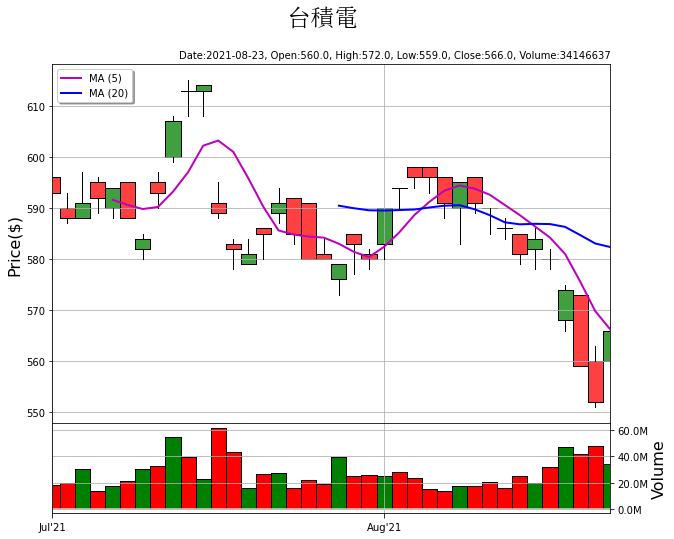

In [26]:
df = get_data_months(stock_id)
kchart.draw(df,sname)
b = client.upload_from_path('123123.png')
link = b['link']
f = open('out123.png','wb')
f.write(urllib.request.urlopen(link).read())
img123 = open('out123.png', 'rb')

<h3>Web Crawler to Get Stock's News <h3>

Here I use BeautifulSoup to conduct web crawler on udn.com

In [28]:
ur = 'https://udn.com/search/word/2/'
url = ur + sname
r = requests.get(url)
count = 0
ncontent = '❗個股新聞❗\n'

if r.status_code == requests.codes.ok:

  soup = BeautifulSoup(r.text, 'html.parser')

  stories = soup.find_all('p')
  for s in stories:
      if sname in s.text:
        a = s.text
        ncontent += '📢📢📢\n'
        ncontent +=  a + '\n'
        ncontent += '-----\n'
        count += 1
        if count == 3:
            break
print(ncontent)

❗個股新聞❗
📢📢📢
晶圓代工龍頭台積電（2330）今（23）日股價強勢反攻，最高攻上572元，收盤價為566元，漲幅為2.54％，上漲14元。台積電上周股價下挫，最低來到551元，從17至20日這四個交易日，遭外資賣超...
-----
📢📢📢
台積電（2330）降低美國新廠建設成本，提高良率，將採用台灣製造整廠輸出、美國組裝。長榮（2603）、萬海（2615）表示，涉及客戶的委託概況，不針對此事回應，陽明（2609）表示，正式收到訂單後會...
-----
📢📢📢
媒體報導，台積電美國新廠建廠費用高昂，將與無塵室廠漢唐採取建廠工項節約利益共享方案；漢唐表示，內容純屬臆測並已造成困擾，特此嚴正異議。台積電在美國亞利桑那州廠投資設立5奈米12吋晶圓廠，經濟日報報導...
-----

